# **Retail Data Analysis**
---
Author :
Christophe NORET

N.B pour Jedha : Travaillant dans le commerce depuis 8 ans et ayant le souhait de tirer parti de ces années pour ma future reconversion, j'ai décidé de démarrer mon portfolio avec un premier projet lié au commerce/retail afin de viser, un jour, un emploi data dans le secteur retail qui est très demandeur mais également pour faire le lien avec ma carrière passée. J'ai donc récupéré un dataset sur kaggle qui est constitué de données anonymisées de ventes hebdomadaires d'une quarantaine de magasin. Il comprends des features sur la température, le prix du carburant, vacances Y/N, promotions en cours etc. Mon intérêt (et celui des magasins) se porte sur la variable Weekly_Sales, je vais donc commencer par préparer et explorer les données puis produire quelques graphiques intéressants comme les corrélations, les ventes par magasins, comparer les chiffres vacances Y/N, les jours fériés Y/N, l'évolution des ventes sur le temps etc. Ensuite pour la partie machine learning, après la partie préparation/train/split, je compte tenter de prédire la variable Weekly_Sales en utilisant les features comme la température, prix du carburant... avec probablement une régression linéaire et/ou random forest. Je réaliserais ensuite la présentation du projet avec l'intégration du code de ce notebook dans un streamlit stocké sur github.

# Data cleaning

## Loading .CSV

In [1]:
# Reading files
import pandas as pd

features = pd.read_csv('data/features.csv')
sales = pd.read_csv('data/sales.csv')
stores = pd.read_csv('data/stores.csv')

## Dataset overview

In [2]:
# First rows of each dataset
print("Features Data:")
display(features.head())

print("\nSales Data:")
display(sales.head())

print("\nStores Data:")
display(stores.head())

Features Data:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Sales Data:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False



Stores Data:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Dataset characteristics

In [3]:
# Display the first few rows of each dataset
print("Features Data:")
print(features.info())

print("\nSales Data:")
print(sales.info())

print("\nStores Data:")
print(stores.info())

Features Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        ------------

**Dates aren't in the datetime format**

### Checking for missing values and duplicates

In [4]:
## Calculation of the percentage of missing values for each dataset

# features.csv
print("\nFeatures Data:")
nan_count = features.isna().sum()
nan_percentage = (features.isna().mean() * 100).round(2)
nan_info = pd.concat([nan_count, nan_percentage], axis = 1, keys = ['NaN Count', '% of NaN'])
print(nan_info)

# sales.csv
print("\nSales Data:")
nan_count = sales.isna().sum()
nan_percentage = (sales.isna().mean() * 100).round(2)
nan_info = pd.concat([nan_count, nan_percentage], axis = 1, keys = ['NaN Count', '% of NaN'])
print(nan_info)

# stores.csv
print("\nStores Data:")
nan_count = stores.isna().sum()
nan_percentage = (stores.isna().mean() * 100).round(2)
nan_info = pd.concat([nan_count, nan_percentage], axis = 1, keys = ['NaN Count', '% of NaN'])
print(nan_info)

## Checking duplicates
print("\nNumber of duplicates in Features : ", features.duplicated().sum())
print("Number of duplicates in Sales : ", sales.duplicated().sum())
print("Number of duplicates in Stores : ", stores.duplicated().sum())


Features Data:
              NaN Count  % of NaN
Store                 0      0.00
Date                  0      0.00
Temperature           0      0.00
Fuel_Price            0      0.00
MarkDown1          4158     50.77
MarkDown2          5269     64.33
MarkDown3          4577     55.89
MarkDown4          4726     57.70
MarkDown5          4140     50.55
CPI                 585      7.14
Unemployment        585      7.14
IsHoliday             0      0.00

Sales Data:
              NaN Count  % of NaN
Store                 0       0.0
Dept                  0       0.0
Date                  0       0.0
Weekly_Sales          0       0.0
IsHoliday             0       0.0

Stores Data:
       NaN Count  % of NaN
Store          0       0.0
Type           0       0.0
Size           0       0.0

Number of duplicates in Features :  0
Number of duplicates in Sales :  0
Number of duplicates in Stores :  0


**Features NaN:** \
MarkDown1: 4158 missing values\
MarkDown2: 5269 missing values\
MarkDown3: 4577 missing values\
MarkDown4: 4726 missing values\
MarkDown5: 4140 missing values\
CPI: 585 missing values\
Unemployment: 585 missing values

**Sales NaN:** \
No missing values

**Stores NaN:** \
No missing values


### Handling missing values

**MarkDown columns:** \
Missing values correspond to no discount, so we can replace them with 0.

**CPI & Unemployment** \
We can fill missing values using forward fill method since these values are typically reported monthly or quarterly.

In [5]:
# Fill missing values in MarkDown columns with 0
features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

# Fill missing values in CPI and Unemployment using ffill
features[['CPI', 'Unemployment']] = features[['CPI', 'Unemployment']].ffill()

# Check for any remaining missing values
print(features.isnull().sum())
print(sales.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


### Date column conversion

**Date column format** \
We can convert the "Date" columns in a datetime format.

In [6]:
# Convert Date columns to datetime format
features['Date'] = pd.to_datetime(features['Date'], format = '%d/%m/%Y')
sales['Date'] = pd.to_datetime(sales['Date'], format = '%d/%m/%Y')

## Data merging

In [7]:
# Merge sales and features datasets on Store and Date columns
merged_data = pd.merge(sales, features, on = ['Store', 'Date'], how = 'left')

# Merge the resulting dataset with stores dataset on Store column
merged_data = pd.merge(merged_data, stores, on = 'Store', how = 'left')

# Characteristics
print("Merged dataset characteristics:")
print(merged_data.info())

# Check for missing values
print("\nMissing values :")
print(merged_data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates :", merged_data.duplicated().sum())

Merged dataset characteristics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool 

In [8]:
# First rows of the merged dataset
display(merged_data.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [9]:
# Save the merged dataset to a new CSV file
merged_data.to_csv('data/merged_retail_data.csv', index = False)

# Exploratory Data Analysis (EDA)

### DataViz' librairies

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive analysis

In [11]:
descriptive_analys = merged_data.describe()
display(descriptive_analys)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328


## Data visualisation

### Correlation matrix

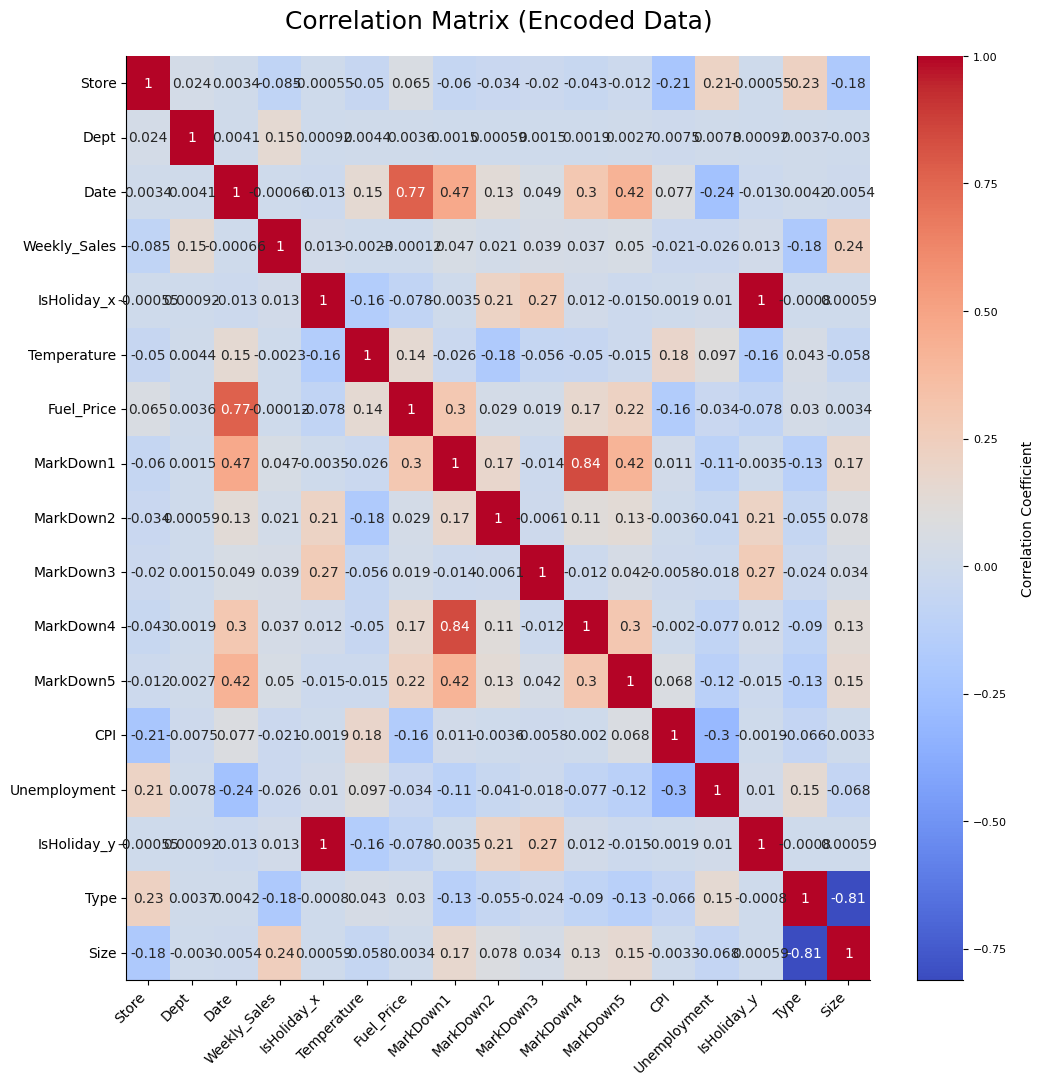

In [12]:
# Encoding categorical variables before calculating the corr matrix
encoded_data = merged_data.copy()
encoded_data['Type'] = encoded_data['Type'].astype('category').cat.codes
encoded_data['IsHoliday_x'] = encoded_data['IsHoliday_x'].astype(int)
encoded_data['IsHoliday_y'] = encoded_data['IsHoliday_y'].astype(int)

# Calculate the correlation matrix
cor = encoded_data.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(cor, 
            annot = True, 
            ax = ax, 
            cmap = 'coolwarm')

# Title and labels
plt.title('Correlation Matrix (Encoded Data)', 
          fontsize = 18, 
          pad = 20)

# Rotate the x-axis labels for better readability
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.yticks(fontsize = 10)

# Customize the color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coefficient', fontsize = 10, labelpad = 10)
cbar.ax.tick_params(labelsize = 8)

sns.despine() # Remove the top and right spines

plt.show()


* The promotions (MarkDown1 to MarkDown5) have weak positive correlations with Weekly Sales, indicating that while there is some positive impact, it's not very strong.
* Temperature has a very weak negative correlation (-0.02) with Weekly Sales.
* Fuel Price shows a weak positive correlation (0.02) with Weekly Sales.
* Date has moderate to high positive correlations with Temperature (0.14) and Fuel Price (0.47), indicating seasonal effects.
* Temperature and Fuel Price have a strong positive correlation (0.30), which makes sense as fuel prices can be influenced by seasonal demand.

* Promotions have a weak but positive impact on sales, suggesting that while they do help in increasing sales, the effect is not very strong.
* There are stronger intercorrelations among certain promotions, indicating they may be applied together.
* Other factors like temperature, fuel price, and economic indicators (CPI and unemployment) have weak correlations with sales.

### Distribution Analysis

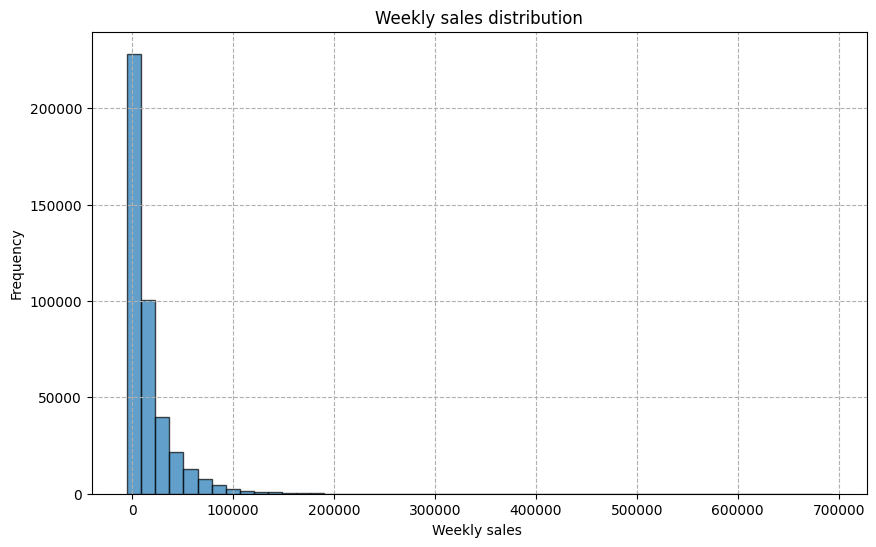

In [13]:
# Weekly sales distribution

plt.figure(figsize = (10, 6))
plt.hist(merged_data['Weekly_Sales'], bins = 50, edgecolor = 'k', alpha = 0.7)
plt.title('Weekly sales distribution')
plt.xlabel('Weekly sales ')
plt.ylabel('Frequency')
plt.grid(True, linestyle = '--')
plt.show()

We can note the presence of negative values but above all that the majority of values are low compared to certain extreme values.
These could be very large stores, such as showcases, or simply outliers to be corrected.

### Total sales by store

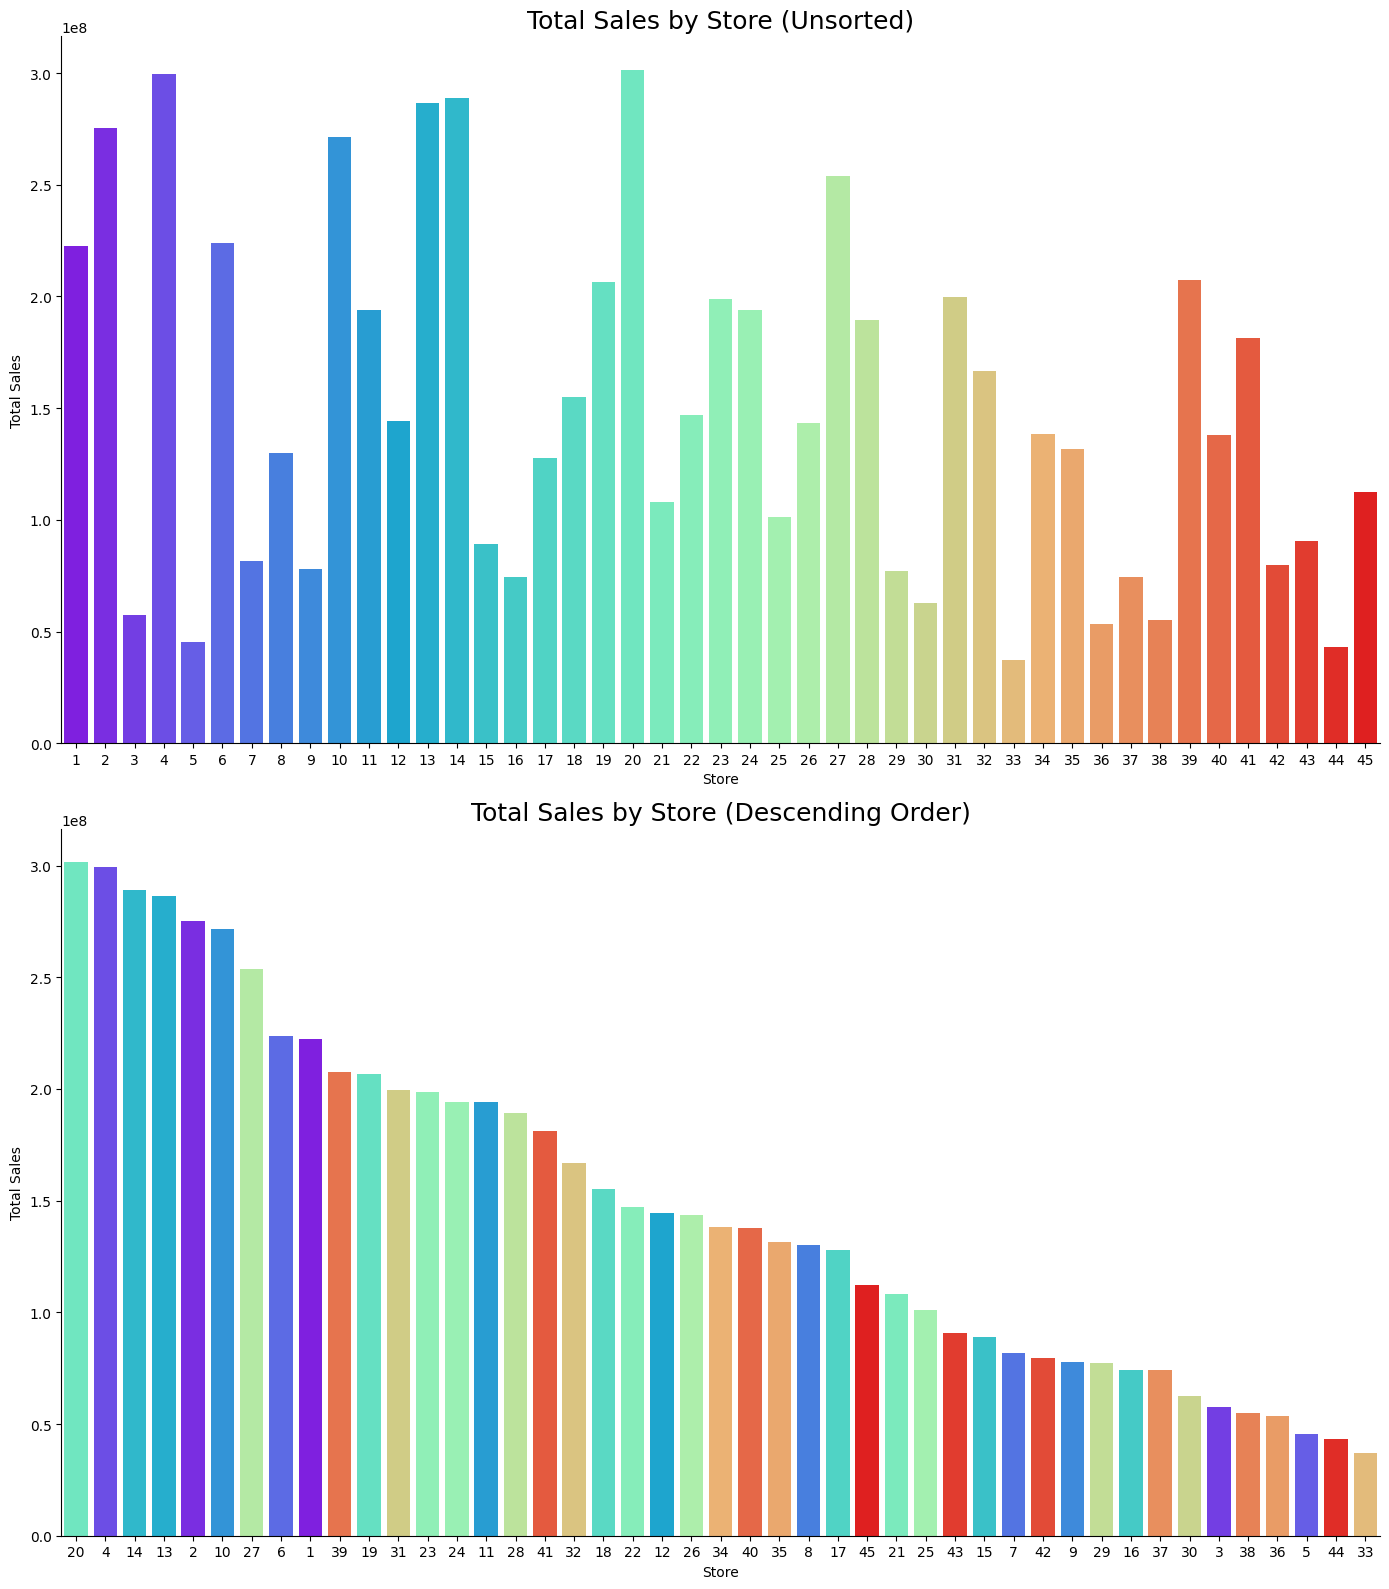

In [14]:
# Calculate total sales by store (Plot 1)
store_sales = merged_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the data by total sales in descending order (Plot 2)
sorted_store_sales = store_sales.sort_values(by = 'Weekly_Sales', ascending = False)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize = (14, 16))

# Plot 1: Total sales by store without sorting
sns.barplot(ax = axes[0], 
            x = 'Store', 
            y = 'Weekly_Sales', 
            data = store_sales, 
            palette = 'rainbow',
            hue = 'Store',
            legend = False)
axes[0].set_title('Total Sales by Store (Unsorted)', fontsize = 18)
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis = 'x')

# Plot 2: Total sales by store with descending order
sns.barplot(ax = axes[1], 
            x = 'Store', 
            y = 'Weekly_Sales',
            data = sorted_store_sales, 
            palette = 'rainbow', 
            order = sorted_store_sales['Store'],
            hue = 'Store',
            legend = False)
axes[1].set_title('Total Sales by Store (Descending Order)', fontsize = 18)
axes[1].set_xlabel('Store')
axes[1].set_ylabel('Total Sales')
axes[1].tick_params(axis = 'x')

sns.despine() # Remove top and right borders 
plt.tight_layout() # Adjust layout for the x-axis labels
plt.show() # Display

### Sales trends over time

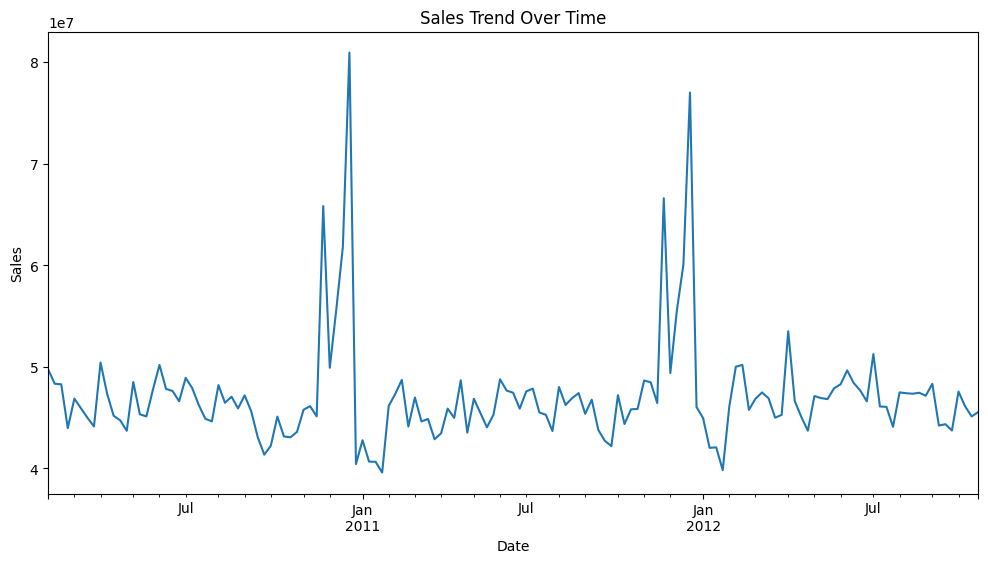

In [15]:
# Sales trends over time

plt.figure(figsize = (12, 6))
merged_data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Machine Learning  WIP

### Encoding & Spliting

## Linear Regression

### Model evaluation

## Random Forest

### Model evaluation